In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno

import warnings
warnings.simplefilter("ignore")

train_path = "./used_car_train_20200313.csv"
test_path = "./used_car_testB_20200421.csv"

In [3]:
train_data = pd.read_csv(train_path, sep=" ")
test_data = pd.read_csv(test_path, sep=" ")

In [6]:
train_data

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149995,163978,20000607,121.0,10,4.0,0.0,1.0,163,15.0,...,0.280264,0.000310,0.048441,0.071158,0.019174,1.988114,-2.983973,0.589167,-1.304370,-0.302592
149996,149996,184535,20091102,116.0,11,0.0,0.0,0.0,125,10.0,...,0.253217,0.000777,0.084079,0.099681,0.079371,1.839166,-2.774615,2.553994,0.924196,-0.272160
149997,149997,147587,20101003,60.0,11,1.0,1.0,0.0,90,6.0,...,0.233353,0.000705,0.118872,0.100118,0.097914,2.439812,-1.630677,2.290197,1.891922,0.414931
149998,149998,45907,20060312,34.0,10,3.0,1.0,0.0,156,15.0,...,0.256369,0.000252,0.081479,0.083558,0.081498,2.075380,-2.633719,1.414937,0.431981,-1.659014


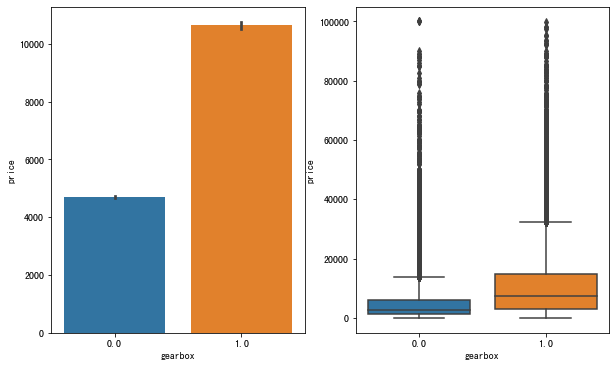

In [7]:
_, axs = plt.subplots(1, 2, figsize=(10, 6))
sns.barplot(x="gearbox", y="price", data=train_data, ax=axs[0])
sns.boxplot(x="gearbox", y="price", data=train_data, ax=axs[1])
plt.show()

In [12]:
train_data = train_data[train_data["power"] < 200]

In [15]:
train_data["train"] = 1
test_data["train"] = 0
data = pd.concat([train_data, test_data], axis=0, ignore_index=True)
data

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,train
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762,1
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522,1
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963,1
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699,1
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185440,249995,111443,20041005,4.0,4,0.0,NaN,1.0,150,15.0,...,0.000292,0.141804,0.076393,0.039272,2.072901,-2.531869,1.716978,-1.063437,0.326587,0
185441,249996,152834,20130409,65.0,1,0.0,0.0,0.0,179,4.0,...,0.000991,0.155868,0.108425,0.067841,1.358504,-3.290295,4.269809,0.140524,0.556221,0
185442,249997,132531,20041211,4.0,4,0.0,0.0,1.0,147,12.5,...,0.000318,0.141872,0.071968,0.042966,2.165658,-2.417885,1.370612,-1.073133,0.270602,0
185443,249998,143405,20020702,40.0,1,4.0,0.0,1.0,176,15.0,...,0.000023,0.067483,0.067526,0.009006,2.030114,-2.939244,0.569078,-1.718245,0.316379,0


In [18]:
data['used_time'] = (pd.to_datetime(data['creatDate'], format='%Y%m%d', errors='coerce') - 
                            pd.to_datetime(data['regDate'], format='%Y%m%d', errors='coerce')).dt.days
data

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,train,used_time
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762,1,4385.0
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522,1,4757.0
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963,1,4382.0
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699,1,7125.0
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482,1,1531.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185440,249995,111443,20041005,4.0,4,0.0,NaN,1.0,150,15.0,...,0.141804,0.076393,0.039272,2.072901,-2.531869,1.716978,-1.063437,0.326587,0,4173.0
185441,249996,152834,20130409,65.0,1,0.0,0.0,0.0,179,4.0,...,0.155868,0.108425,0.067841,1.358504,-3.290295,4.269809,0.140524,0.556221,0,1079.0
185442,249997,132531,20041211,4.0,4,0.0,0.0,1.0,147,12.5,...,0.141872,0.071968,0.042966,2.165658,-2.417885,1.370612,-1.073133,0.270602,0,4113.0
185443,249998,143405,20020702,40.0,1,4.0,0.0,1.0,176,15.0,...,0.067483,0.067526,0.009006,2.030114,-2.939244,0.569078,-1.718245,0.316379,0,5017.0


In [24]:
train_db = train_data.groupby("brand")
allinfo = {}
for kind, kind_data in train_db:
    info = {}
    kind_data = kind_data[kind_data["price"] > 0]
    info['brand_amount'] = len(kind_data)
    info['brand_price_max'] = kind_data.price.max()
    info['brand_price_median'] = kind_data.price.median()
    info['brand_price_min'] = kind_data.price.min()
    info['brand_price_sum'] = kind_data.price.sum()
    info['brand_price_std'] = kind_data.price.std()
    info['brand_price_average'] = round(kind_data.price.sum() / (len(kind_data) + 1), 2)
    allinfo[kind] = info
pd.DataFrame(allinfo).T.reset_index().rename(columns={"index": "brand"})

,brand,brand_amount,brand_price_max,brand_price_median,brand_price_min,brand_price_sum,brand_price_std,brand_price_average
0,0,30074.0,68500.0,2990.0,13.0,152865616.0,5721.999361,5082.81
1,1,10912.0,84000.0,4650.0,15.0,79605003.0,7370.864133,7294.51
2,2,170.0,26500.0,6000.0,35.0,1389006.0,6247.572399,8122.84
3,3,2415.0,37500.0,4900.0,65.0,15295425.0,5262.322922,6330.89
4,4,12988.0,99999.0,4400.0,12.0,85126850.0,6519.364485,6553.76
5,5,4604.0,29950.0,2300.0,20.0,14933656.0,3237.251803,3242.92
6,6,9861.0,35990.0,1700.0,13.0,32276020.0,4080.425848,3272.77
7,7,2299.0,32900.0,2500.0,60.0,9315405.0,4596.237220,4050.18
8,8,1973.0,99999.0,2100.0,30.0,8583614.0,5512.557614,4348.34
9,9,7230.0,68530.0,1400.0,50.0,17148407.0,2807.727136,2371.51
